### ADS 509
### Assignment 3.1
### Dingyi Duan
#### GitHub: https://github.com/dingyiduan7/ADS_509_module3

# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [2]:
# Use this space for any additional import statements you need
import datetime
from lexical_diversity import lex_div as ld

In [87]:
# Place any addtional functions or constants you need here. 

# punctuation variations
punctuation = set(punctuation) # speeds up comparison
punctuation.add('’') # after seeing many non-English single quote (‘ or ’）, I manually add it into the library
punctuation.add('•') # after seeing many ‘•’, I manually add it into the library
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")
sw = [i.replace("'","") for i in sw]  # remove single quote from sw
sw.append('nan') # add 'nan' to sw - we don't want to see nan's in our tokens 
sw.append('im') # add 'im' to sw - we don't want to see nan's in our tokens

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")



# It's handy to have a full set of emojis
#all_language_emojis = set()
#
#for country in emoji.EMOJI_DATA : 
#    for em in emoji.EMOJI_DATA[country] : 
#        all_language_emojis.add(em)




# # re-use the descriptive statistics I did in module 2
def descriptive_stats_ddy(tokens) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = ld.ttr(tokens)
    num_characters = sum([len(token) for token in tokens])
    top5_tokens = Counter(tokens).most_common()[:5]
    
    
    print(f"There are {num_tokens} tokens in the data.")
    print(f"There are {num_unique_tokens} unique tokens in the data.")
    print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    print(f"There are {num_characters} characters in the data.")
    print(f"These are the five most common tokens in the data: {top5_tokens}.")

    return "\n\n"

    
def is_emoji(s):
    
    return emoji.distinct_emoji_list(s)

def contains_emoji(s):
    s = str(s)
    emojis = [i for i in s if is_emoji(i)]
    return len(emojis)>0

def remove_song_title(s): 
    return re.sub(r'\[.*?\]', '', s)

def lower_case(text):
    return text.casefold()
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    return text.split()

def remove_stop(tokens) :
    # modify this function to remove stopwords
    tokens = [i for i in tokens if not i in sw]
    return tokens

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return tokens


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [4]:
# Feel free to use the below cells as an example or read in the data in a way you prefer

data_location = "D:/USD-ADS_graduate/ADS-509/Module 1/ADS_509_module1/"
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'MariahCarey':'MariahCarey_followers.txt',
                'NICKIMINAJ':'NICKIMINAJ_followers.txt'}


In [5]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['MariahCarey'],
                           sep="\t")
                           # no need for quoting=3

twitter_data['artist'] = "MariahCarey"

In [6]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['NICKIMINAJ'],
                             sep="\t")
                             # no need for quoting=3
twitter_data_2['artist'] = "NICKIMINAJ"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)
twitter_data

,screen_name,name,location,description,followers_count,friends_count,artist
0,Lovely_breeeeee,Bree Baby,None,NaN,0,19,MariahCarey
1,MaryJay0925,Mary Jones,None,NaN,14,177,MariahCarey
2,xttrippiecattx,xttrippiecattx,N Y,NaN,87,322,MariahCarey
3,RosieMoore27,Rosie Moore Ms. World Universal Elite,"Windermere, FL",There’s nothing more inspiring than a story th...,89,612,MariahCarey
4,IsaiahBlack27,Saiah,None,♑️ | Bi | Take It Or Leave It 🤷🏾‍♂️| Don’t sta...,227,344,MariahCarey
...,...,...,...,...,...,...,...
100892,NovakKailee,Kailee novak,"Kingston, Ontario",NaN,0,2,NICKIMINAJ
100893,sportRhard,P.K,"Chicago, IL",Hopefully it's nice out today,60,521,NICKIMINAJ
100894,Shariqasghar22,Shariq asghar,None,NaN,4,88,NICKIMINAJ
100895,AaronSteer13,Aaron Steer,None,NaN,0,20,NICKIMINAJ


In [7]:
# read in the lyrics here
lyrics_path = data_location + lyrics_folder
artists = os.listdir(lyrics_path)

a = []
b = []
c = []

for artist in artists:
    raw_song = os.listdir(lyrics_path+artist)
    for song in raw_song:
        a.append(str(artist))
        f = open(lyrics_path+artist+'/'+song, "r")
        song = re.search('_(.+?).txt',song).group(1)
        b.append(song)  
        c.append(f.read())

lyrics_data = pd.DataFrame({'artist':a,
                           'title':b,
                           'lyrics':c})

lyrics_data

,artist,title,lyrics
0,Mariah Carey,allinyourmind,['All In Your Mind']\n\nCome closer\nYou seem ...
1,Mariah Carey,aloneinlove,['Alone In Love']\n\nSwept me away\nBut now I'...
2,Mariah Carey,andyoudontremember,['And You Don't Remember']\n\nShattered dreams...
3,Mariah Carey,anytimeyouneedafriend,['Any Time You Need A Friend']\n\nIf you're lo...
4,Mariah Carey,cantletgo,"['Can't Let Go']\n\nThere you are, holding her..."
5,Mariah Carey,dreamlover,['Dream Lover']\n\nI need a lover to give me\n...
6,Mariah Carey,emotions,['Emotions']\n\nYou've got me feeling emotions...
7,Mariah Carey,hero,['Hero']\n\nThere's a hero\nIf you look inside...
8,Mariah Carey,idontwannacry,['I Don't Wanna Cry']\n\nOnce again we sit in ...
9,Mariah Carey,ifitsover,['If It's Over']\n\nWon't you talk to me\nThis...


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove punctuation
* Split on whitespace
* Remove stopwords (optional)

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove punctuation other than emojis or hashtags
* Split on whitespace
* Remove stopwords

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [8]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline_lyrics = [remove_song_title,lower_case, remove_punctuation, tokenize, remove_stop]
my_pipeline_twitter = [lower_case, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline_lyrics)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline_twitter)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [9]:
lyrics_data

,artist,title,lyrics,tokens,num_tokens
0,Mariah Carey,allinyourmind,['All In Your Mind']\n\nCome closer\nYou seem ...,"[come, closer, seem, far, away, theres, someth...",146
1,Mariah Carey,aloneinlove,['Alone In Love']\n\nSwept me away\nBut now I'...,"[swept, away, im, lost, dark, set, fire, im, l...",132
2,Mariah Carey,andyoudontremember,['And You Don't Remember']\n\nShattered dreams...,"[shattered, dreams, cut, mind, tragically, lov...",101
3,Mariah Carey,anytimeyouneedafriend,['Any Time You Need A Friend']\n\nIf you're lo...,"[lonely, need, friend, troubles, seem, like, n...",153
4,Mariah Carey,cantletgo,"['Can't Let Go']\n\nThere you are, holding her...","[holding, hand, lost, dying, understand, cheri...",126
5,Mariah Carey,dreamlover,['Dream Lover']\n\nI need a lover to give me\n...,"[need, lover, give, kind, love, last, always, ...",129
6,Mariah Carey,emotions,['Emotions']\n\nYou've got me feeling emotions...,"[got, feeling, emotions, deeper, ive, ever, dr...",130
7,Mariah Carey,hero,['Hero']\n\nThere's a hero\nIf you look inside...,"[theres, hero, look, inside, heart, afraid, th...",114
8,Mariah Carey,idontwannacry,['I Don't Wanna Cry']\n\nOnce again we sit in ...,"[sit, silence, said, done, emptiness, inside, ...",159
9,Mariah Carey,ifitsover,['If It's Over']\n\nWon't you talk to me\nThis...,"[talk, hand, somethings, gone, wrong, life, pl...",68


In [10]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

In [11]:
twitter_data

,screen_name,name,location,description,followers_count,friends_count,artist,tokens,num_tokens,has_emoji
0,Lovely_breeeeee,Bree Baby,None,NaN,0,19,MariahCarey,[],0,False
1,MaryJay0925,Mary Jones,None,NaN,14,177,MariahCarey,[],0,False
2,xttrippiecattx,xttrippiecattx,N Y,NaN,87,322,MariahCarey,[],0,False
3,RosieMoore27,Rosie Moore Ms. World Universal Elite,"Windermere, FL",There’s nothing more inspiring than a story th...,89,612,MariahCarey,"[theres, nothing, inspiring, story, touches, h...",10,False
4,IsaiahBlack27,Saiah,None,♑️ | Bi | Take It Or Leave It 🤷🏾‍♂️| Don’t sta...,227,344,MariahCarey,"[♑️, bi, take, leave, 🤷🏾‍♂️, start, nun, nun, ...",9,True
...,...,...,...,...,...,...,...,...,...,...
100892,NovakKailee,Kailee novak,"Kingston, Ontario",NaN,0,2,NICKIMINAJ,[],0,False
100893,sportRhard,P.K,"Chicago, IL",Hopefully it's nice out today,60,521,NICKIMINAJ,"[hopefully, nice, today]",3,False
100894,Shariqasghar22,Shariq asghar,None,NaN,4,88,NICKIMINAJ,[],0,False
100895,AaronSteer13,Aaron Steer,None,NaN,0,20,NICKIMINAJ,[],0,False


Let's take a quick look at some descriptions with emojis.

In [12]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
55287,MariahCarey,اتعـب ع حاجتـكك مفش حد متمنيلك الخـيرر🌪️🖤.,"[اتعـب, ع, حاجتـكك, مفش, حد, متمنيلك, الخـيرر🌪️🖤]"
64998,NICKIMINAJ,18+ ONLY • snap: mulattabunz • 💸: $jnhbby • OF...,"[18, snap, mulattabunz, 💸, jnhbby, link, ⬇️, b..."
70971,MariahCarey,Introvert 😎😎😎😎,"[introvert, 😎😎😎😎]"
50591,MariahCarey,☮️New Twitter account just a girl ❤️❤️❤️🐾🐾 Chi...,"[☮️new, twitter, account, girl, ❤️❤️❤️🐾🐾, chic..."
80803,MariahCarey,⚽️🚼,[⚽️🚼]
66108,MariahCarey,i believe Aang can save the world 😗,"[believe, aang, save, world, 😗]"
7599,MariahCarey,Scandinavian couple making OF-content while tr...,"[scandinavian, couple, making, ofcontent, trav..."
1895,NICKIMINAJ,🙆🏽‍♀️ imma make it out,"[🙆🏽‍♀️, imma, make]"
65858,MariahCarey,Familia✨,[familia✨]
77200,MariahCarey,Love is a verb❤,"[love, verb❤]"


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: In order to ultimately compare the tokens, I could also add a new column for something like "top 5 most common tokens" OR double check the inclusion of any stop words after the punctuations are removed.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [13]:
# your code here

# re-use the function from module 2

"""
convert the dataframe columns into a giant single list of tokens and 
feed them into the descriptive stats function
"""
start_time = datetime.datetime.now()
mariah_tokens  = lyrics_data['tokens'].loc[lyrics_data['artist'] == 'Mariah Carey']
nicki_tokens   = lyrics_data['tokens'].loc[lyrics_data['artist'] == 'Nicki Minaj']

mariah_tokens_sum = []
for i in range(len(mariah_tokens)):
    mariah_tokens_sum = mariah_tokens_sum + mariah_tokens[i] # use + to stitch all list together

nicki_tokens_sum = []
for i in range(len(nicki_tokens)):
    nicki_tokens_sum = nicki_tokens_sum + nicki_tokens[i+len(mariah_tokens)] # index for nicki starts 
                                                                             # from 26 where mariah left over
print("For Mariah Carey's lyrics: \n")
print(descriptive_stats_ddy(mariah_tokens_sum))

print("For Nicki Minaj's lyrics: \n")
print(descriptive_stats_ddy(nicki_tokens_sum))

end_time = datetime.datetime.now()
print("Total time consumed:", end_time-start_time)

For Mariah Carey's lyrics: 

There are 3474 tokens in the data.
There are 651 unique tokens in the data.
The lexical diversity is 0.187 in the data.
There are 16892 characters in the data.
These are the five most common tokens in the data: [('love', 108), ('know', 76), ('baby', 71), ('need', 69), ('im', 66)].



For Nicki Minaj's lyrics: 

There are 6367 tokens in the data.
There are 1934 unique tokens in the data.
The lexical diversity is 0.304 in the data.
There are 29452 characters in the data.
These are the five most common tokens in the data: [('im', 227), ('like', 150), ('get', 117), ('buck', 106), ('bitches', 86)].



Total time consumed: 0:00:00.004000


### We can see that the word "im" is in the top 5 common tokens for both artists, let's remove that and ran this again

In [14]:
while 'im' in mariah_tokens_sum: mariah_tokens_sum.remove('im') 
while 'im' in nicki_tokens_sum: nicki_tokens_sum.remove('im') 

print("For Mariah Carey's lyrics: \n")
print(descriptive_stats_ddy(mariah_tokens_sum))

print("For Nicki Minaj's lyrics: \n")
print(descriptive_stats_ddy(nicki_tokens_sum))

For Mariah Carey's lyrics: 

There are 3408 tokens in the data.
There are 650 unique tokens in the data.
The lexical diversity is 0.191 in the data.
There are 16760 characters in the data.
These are the five most common tokens in the data: [('love', 108), ('know', 76), ('baby', 71), ('need', 69), ('make', 59)].



For Nicki Minaj's lyrics: 

There are 6140 tokens in the data.
There are 1933 unique tokens in the data.
The lexical diversity is 0.315 in the data.
There are 28998 characters in the data.
These are the five most common tokens in the data: [('like', 150), ('get', 117), ('buck', 106), ('bitches', 86), ('know', 86)].





Q: what observations do you make about these data? 

A: We can see that Mariah Carey's lyrics are more intimate and mellow, and mostly children-friendly; While Nicki's lyrics are more dominating and aggressive, and likely to be rated PG-13. This matches the common impression of these two artists.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [15]:
# since we already have the corpus of the lyrics, let's focus on getting the same thing for twitter description

# let's first see if emoji's are worth counting by finding out how many descriptions have emojis in them

print(twitter_data['has_emoji'].value_counts())

# There are way less emojis than words - we'll ignore the emojis for now

# collecting the corpus for twitter data like we did for lyrics 

start_time = datetime.datetime.now()
mariah_tokens_twitter  = twitter_data['tokens'].loc[twitter_data['artist'] == 'MariahCarey']
nicki_tokens_twitter   = twitter_data['tokens'].loc[twitter_data['artist'] == 'NICKIMINAJ']

mariah_tokens_twitter_sum = []
for i in range(len(mariah_tokens_twitter)):
    mariah_tokens_twitter_sum = mariah_tokens_twitter_sum + mariah_tokens_twitter[i] # use + to stitch all list together

nicki_tokens_twitter_sum = []
for i in range(len(nicki_tokens_twitter)):
    nicki_tokens_twitter_sum = nicki_tokens_twitter_sum + nicki_tokens_twitter[i]
    
while 'im' in mariah_tokens_twitter_sum: mariah_tokens_twitter_sum.remove('im') # remove 'im' like we did in lyrics
while 'im' in nicki_tokens_twitter_sum: nicki_tokens_twitter_sum.remove('im') # remove 'im' like we did in lyrics
    
end_time = datetime.datetime.now()
print("Total time consumed:", end_time-start_time)

False    171873
True      29895
Name: has_emoji, dtype: int64
Total time consumed: 0:02:54.568597


In [16]:
# The overall corpus
All_sum = mariah_tokens_sum + nicki_tokens_sum + mariah_tokens_twitter_sum + nicki_tokens_twitter_sum

### Now we have 4 corpora: 

#### twitter: mariah_tokens_twitter_sum | nicki_tokens_twitter_sum
#### lyrics: mariah_tokens_sum | nicki_tokens_sum

In [17]:
# find the top 10 words in mariah_tokens_twitter_sum
top10_mariah_twitter = Counter(mariah_tokens_twitter_sum).most_common()[:10]

# find the top 10 words in nicki_tokens_twitter_sum
top10_nicki_twitter = Counter(nicki_tokens_twitter_sum).most_common()[:10]

# find the top 10 words in mariah_tokens_sum
top10_mariah_lyrics = Counter(mariah_tokens_sum).most_common()[:10]

# find the top 10 words in nicki_tokens_sum
top10_nicki_lyrics = Counter(nicki_tokens_sum).most_common()[:10]

# find the unique word in All_sum
top10_all = Counter(All_sum).most_common()[:10]

#### Since we have enough data, there is no need to use cutoff = 5, all top 10 words are well over 5 counts.

In [140]:
"""
It's a little confusing on what is expected in this section, so I went with the most direct way:

1. find the frequency of top 10 words in each doc
2. find the frequency of each of 10 top words in the overall doc
3. use the (frequency of word in top 10) / len(each doc) to get ratio for each top 10 words in each doc
4. use (frequency of word in top 10) / len(overall doc) to get ratio for each top 10 words in the overall doc

"""

"\nIt's a little confusing on what is expected in this section, so I went with the most direct way:\n\n1. find the frequency of top 10 words in each doc\n2. find the frequency of each of 10 top words in the overall doc\n3. use the (frequency of word in top 10) / len(each doc) to get ratio for each top 10 words in each doc\n4. use (frequency of word in top 10) / len(overall doc) to get ratio for each top 10 words in the overall doc\n\n"

In [118]:
# top 10 words for each doc and all docs combined

# for top10_mariah_twitter =========================
print("The top 10 words in Mariah's fans' descriptions are:\n")
for i in top10_mariah_twitter:
    print(i)
    
print('\nThe frequency for each Mariah fans descriptions top 10 words in all docs are:\n')
for i in range(len(top10_mariah_twitter)):
    print("'",top10_mariah_twitter[i][0],"'","has a frequency of", All_sum.count(top10_mariah_twitter[i][0]),"in all docs")
    
# for top10_nicki_twitter ===========================
print("\nThe top 10 words in Nicki's fans' descriptions are:\n")
for i in top10_nicki_twitter:
    print(i)
    
print('\nThe frequency for each Nicki fans descriptions top 10 words in all docs are:\n')
for i in range(len(top10_nicki_twitter)):
    print("'",top10_nicki_twitter[i][0],"'","has a frequency of", All_sum.count(top10_nicki_twitter[i][0]),"in all docs")
    
# for top10_mariah_lyrics =============================
print("\nThe top 10 words in Mariah's lyrics are:\n")
for i in top10_mariah_lyrics:
    print(i)
    
print('\nThe frequency for each Mariah lyrics top 10 words in all docs are:\n')
for i in range(len(top10_mariah_lyrics)):
    print("'",top10_mariah_lyrics[i][0],"'","has a frequency of", All_sum.count(top10_mariah_lyrics[i][0]),"in all docs")

# for top10_nicki_lyrics =============================
print("\nThe top 10 words in Nicki's lyrics are:\n")
for i in top10_nicki_lyrics:
    print(i)

print('\nThe frequency for each Nicki lyrics top 10 words in all docs are:\n')
for i in range(len(top10_nicki_lyrics)):
    print("'",top10_nicki_lyrics[i][0],"'","has a frequency of", All_sum.count(top10_nicki_lyrics[i][0]),"in all docs")

The top 10 words in Mariah's fans' descriptions are:

('love', 3460)
('life', 2011)
('de', 1802)
('music', 1244)
('like', 1166)
('god', 1109)
('la', 1013)
('fun', 890)
('good', 858)
('fan', 805)

The frequency for each Mariah fans descriptions top 10 words in all docs are:

' love ' has a frequency of 4888 in all docs
' life ' has a frequency of 2936 in all docs
' de ' has a frequency of 2435 in all docs
' music ' has a frequency of 1693 in all docs
' like ' has a frequency of 1852 in all docs
' god ' has a frequency of 1651 in all docs
' la ' has a frequency of 1338 in all docs
' fun ' has a frequency of 1236 in all docs
' good ' has a frequency of 1236 in all docs
' fan ' has a frequency of 1181 in all docs

The top 10 words in Nicki's fans' descriptions are:

('love', 1309)
('life', 894)
('ig', 696)
('de', 633)
('god', 538)
('like', 517)
('new', 507)
('follow', 506)
('account', 459)
('music', 448)

The frequency for each Nicki fans descriptions top 10 words in all docs are:

' love 

#### If we want to look at the ratios, we'll use the frequency of each top 10 words in each doc / in all doc.

We will use occurance of top 10 words in a single doc / occurance of those words in all docs to calculate ratios

In [137]:
# for top10_mariah_twitter =========================
print("The top 10 words ratio in Mariah's fans' descriptions are:\n")
for i in top10_mariah_twitter:
    print(i[0], '{:.2%}'.format(i[1]/len(mariah_tokens_twitter_sum)))
    
print('\nThe ratio for each Mariah fans descriptions top 10 words in all docs are:\n')
for i in range(len(top10_mariah_twitter)):
    print(top10_mariah_twitter[i][0], '{:.2%}'.format(All_sum.count(top10_mariah_twitter[i][0])/len(All_sum)))
    
# for top10_nicki_twitter ===========================
print("\nThe top 10 words ratio in Nicki's fans' descriptions are:\n")
for i in top10_nicki_twitter:
    print(i[0], '{:.2%}'.format(i[1]/len(nicki_tokens_twitter_sum)))
    
print('\nThe ratio for each Nicki fans descriptions top 10 words in all docs are:\n')
for i in range(len(top10_nicki_twitter)):
    print(top10_nicki_twitter[i][0], '{:.2%}'.format(All_sum.count(top10_nicki_twitter[i][0])/len(All_sum)))
    
# for top10_mariah_lyrics =============================
print("\nThe top 10 words ratio in Mariah's lyrics are:\n")
for i in top10_mariah_lyrics:
    print(i[0], '{:.2%}'.format(i[1]/len(mariah_tokens_sum)))
    
print('\nThe ratio for each Mariah lyrics top 10 words in all docs are:\n')
for i in range(len(top10_mariah_lyrics)):
    print(top10_mariah_lyrics[i][0], '{:.2%}'.format(All_sum.count(top10_mariah_lyrics[i][0])/len(All_sum)))

# for top10_nicki_lyrics =============================
print("\nThe top 10 words ratio in Nicki's lyrics are:\n")
for i in top10_nicki_lyrics:
    print(i[0], '{:.2%}'.format(i[1]/len(nicki_tokens_sum)))
    
print('\nThe ratio for each Nicki lyrics top 10 words in all docs are:\n')
for i in range(len(top10_nicki_lyrics)):
    print(top10_nicki_lyrics[i][0], '{:.2%}'.format(All_sum.count(top10_nicki_lyrics[i][0])/len(All_sum)))


The top 10 words ratio in Mariah's fans' descriptions are:

love 1.23%
life 0.71%
de 0.64%
music 0.44%
like 0.41%
god 0.39%
la 0.36%
fun 0.32%
good 0.30%
fan 0.29%

The ratio for each Mariah fans descriptions top 10 words in all docs are:

love 1.09%
life 0.66%
de 0.55%
music 0.38%
like 0.41%
god 0.37%
la 0.30%
fun 0.28%
good 0.28%
fan 0.26%

The top 10 words ratio in Nicki's fans' descriptions are:

love 0.85%
life 0.58%
ig 0.45%
de 0.41%
god 0.35%
like 0.33%
new 0.33%
follow 0.33%
account 0.30%
music 0.29%

The ratio for each Nicki fans descriptions top 10 words in all docs are:

love 1.09%
life 0.66%
ig 0.23%
de 0.55%
god 0.37%
like 0.41%
new 0.28%
follow 0.23%
account 0.22%
music 0.38%

The top 10 words ratio in Mariah's lyrics are:

love 3.17%
know 2.23%
baby 2.08%
need 2.02%
make 1.73%
away 1.35%
wanna 1.17%
got 1.14%
see 1.09%
let 1.06%

The ratio for each Mariah lyrics top 10 words in all docs are:

love 1.09%
know 0.19%
baby 0.08%
need 0.09%
make 0.22%
away 0.03%
wanna 0.06%
g

Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: The word "love", "life", and "god" are very popular among both artists' fanbase. Besides what we discussed in Module 2 that Nicki's lyrics are aggressive and inapproapriate while Mariah's are more charming and friendly, Nicki's fans seem to like attention much more from the keywords of "follow", "account".

In [169]:
"""
Using count() takes much longer than Counter(). I'm writing a sample code 
for one doc (mariah_tokens_twitter_sum) just to demostrate that I know how 
to do this..
"""


start_time = datetime.datetime.now()
words = []
ratio = []

for i in mariah_tokens_sum:
    if mariah_tokens_sum.count(i) >= 5:
        c = All_sum.count(i)
        c2 = mariah_tokens_sum.count(i)
        r = c2/c
        words.append(i)
        ratio.append(r)
word_count = dict(zip(words, ratio))
end_time = datetime.datetime.now()
print("Total time consumed:", end_time-start_time)
print(word_count)

Total time consumed: 0:00:14.974495
{'come': 0.05660377358490566, 'away': 0.33093525179856115, 'theres': 0.22727272727272727, 'something': 0.04854368932038835, 'know': 0.09069212410501193, 'need': 0.16995073891625614, 'say': 0.03503184713375796, 'feel': 0.15350877192982457, 'emotions': 0.5185185185185185, 'look': 0.0430622009569378, 'eyes': 0.11965811965811966, 'much': 0.04697986577181208, 'realize': 0.25, 'hey': 0.04983388704318937, 'darling': 0.28, 'think': 0.034161490683229816, 'love': 0.0220949263502455, 'baby': 0.1977715877437326, 'mind': 0.07734806629834254, 'yes': 0.06790123456790123, 'worry': 0.11627906976744186, 'hold': 0.24, 'yeah': 0.1694915254237288, 'ooh': 0.6111111111111112, 'believe': 0.09538461538461539, 'nothing': 0.012345679012345678, 'feeling': 0.2857142857142857, 'well': 0.0228310502283105, 'oh': 0.17647058823529413, 'got': 0.08685968819599109, 'let': 0.09574468085106383, 'lost': 0.07758620689655173, 'fire': 0.14084507042253522, 'alone': 0.23684210526315788, 'beyond

In [172]:
word_count_df = pd.DataFrame(word_count.items(), columns = ['word', 'ratio'])

# extract top 10
word_count_df.nlargest(n=10, columns=['ratio'])

,word,ratio
87,captured,1.000000
108,dreamed,1.000000
113,tenderly,1.000000
146,prisoner,1.000000
161,vanishing,1.000000
165,hastily,1.000000
162,drifting,0.833333
110,heavens,0.750000
106,deeper,0.666667
153,someday,0.621622


Now this is interesting... top 10 words using ratio gives some unusual words..

This means that the word that appears in a certain doc is probably ONLY used in that doc.

Thus, the results from this way does not justify the actual statistics we want.

So.. is this why we use Tf-idf?

I would still prefer to use Counter() to find the top N words in each doc and their occurances in all docs combined,

then calculate the percentage that way.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [89]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if sw is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in sw}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

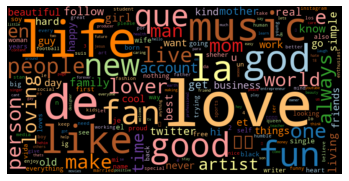

In [90]:
# Mariah Carey's twitter description wordcoud
df_mc_twitter = count_words(twitter_data.loc[twitter_data['artist'] == 'MariahCarey'], column='tokens', preprocess=None, min_freq=2)
wordcloud(df_mc_twitter['freq'], title=None, max_words=200, stopwords=None)

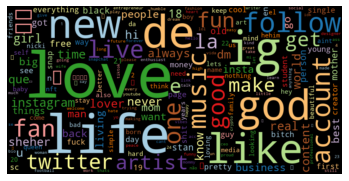

In [91]:
# Nicki Minaj's twitter description wordcoud
df_nm_twitter = count_words(twitter_data.loc[twitter_data['artist'] == 'NICKIMINAJ'], column='tokens', preprocess=None, min_freq=2)
wordcloud(df_nm_twitter['freq'], title=None, max_words=200, stopwords=None)

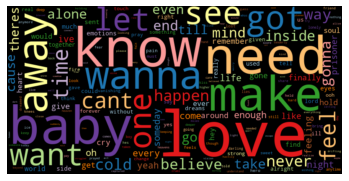

In [92]:
# Mariah Carey's lyrics wordcoud
df_mc_lyrics = count_words(lyrics_data.loc[lyrics_data['artist'] == 'Mariah Carey'], column='tokens', preprocess=None, min_freq=2)
wordcloud(df_mc_lyrics['freq'], title=None, max_words=200, stopwords=None)

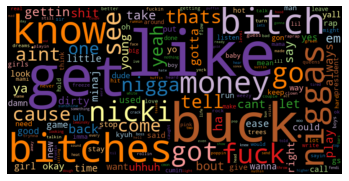

In [93]:
# Nicki Minaj's lyrics wordcoud
df_nm_lyrics = count_words(lyrics_data.loc[lyrics_data['artist'] == 'Nicki Minaj'], column='tokens', preprocess=None, min_freq=2)
wordcloud(df_nm_lyrics['freq'], title=None, max_words=200, stopwords=None)

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: The higher the frequency, the bigger the word appears in the wordcloud, and all matches the descriptive statistics we did earlier.